# Gender representation at specialized astronomy conferences

#### *Kyle Willett (Univ. of Minnesota)*
##### Latest 

Recently, members of the astronomy community have started to track participation at conferences as a function of gender, particularly relating to question/answer sessions after oral presentations. This is intended to address some basic questions about behavior at conferences, such as:

* How equal are the allotments of talks among men and women?
* Are men and women asking questions at the same rate?
* Does it matter if the speaker/session chair is a man or a woman?
* Are women/men more likely to ask the ***first*** question in a session? Does this affect the gender balance of remaining questions?

In the broader sense, this is intended to measure if our collective behavior at conferences --- in choosing speakers, engaging with them, and interacting with the audience --- is as inclusive as it should be. If not, then hopefully the community can come up with some ideas of best practices to follow and alleviate some of these trends. 

Data-gathering efforts were first led by James Davenport at the [223rd American Astronomical Society (AAS) meeting in 2014](http://www.ifweassume.com/2014/03/report-gender-in-aas-talks.html), and repeated at the [225th AAS meeting in 2015](http://nbviewer.ipython.org/github/jradavenport/aas225-gender/blob/master/analysis.ipynb) and the [National Astronomy Meeting (NAM) in the UK in 2014](http://arxiv.org/abs/1412.4571). These focus on question/answer sessions since these are public, quantifiable, and one of the main ways in which professional interaction takes place. These studies found that men ask disproportionally more questions than women, and that the gender of the session chair has a strong impact on the gender ratio of questioners. However, there aren't any data (yet) on whether smaller, more specialized meetings follow the same trends as AAS and NAM, which are much larger and thematically broader overall.  

I tracked this data for a recent conference on "**Unveiling the AGN-Galaxy Evolution Connection**". It was held in Puerto Varas, Chile from [9-13 March 2015](http://www.astro-udec.cl/agn15/). There were a total of 200 people on the list of participants. A one-person team [(me)](https://twitter.com/kwwillett) kept track of the gender of speakers, chairs, and questioners for all of the 72 talks given at the conference (hereafter referred to as <span style="color:red">AGN2015</span>). Here are the results. 

## What are the overall demographics of the conference?

Populating the interactive namespace from numpy and matplotlib
                       M         F
First question  0.614286  0.385714
Questioners     0.641509  0.358491
Attendees       0.564246  0.435754
Chairs          0.785714  0.214286
Speakers        0.549296  0.450704


//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


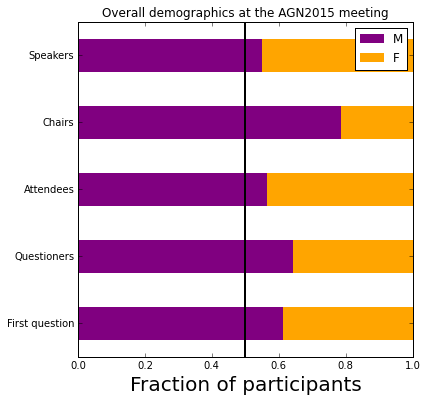

In [1]:
%pylab inline

'''
Note: this notebook requires the following, fairly standard Python packages:

    numpy
    scipy
    matplotlib
    pandas
    
And one not-as-common package (also available through PyPI):

    sexmachine
'''

from __future__ import division
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

gencolors =('purple','orange')

# Load data (stored as CSV files)
urlbase = 'https://raw.githubusercontent.com/willettk/chile2015-gender/master'
q = pd.read_csv('%s/question_data.csv' % urlbase)
c = pd.read_csv('%s/chair_data.csv' % urlbase)

"""
Process: add up the number of males and females over all talks for each of the following roles:

    speakers        person giving the talk
    chairs          person organizing the session and calling on participants who are raising hands w/questions
    attendees       all participants at the conference
    questioners     person asking a question of the speaker, having been called on by the chair
    first question  first person in a session to ask a question
    
    Use `value_counts` function in pandas to count number of occurences for each unique value
"""

# Speakers
vc_speakers = q['speaker'].value_counts()

# Questioners
qa=list(q['questions'])
qa.remove(' ')
vc_questioners = pd.value_counts(list(''.join(qa)))

# People who asked the first question of the speakers
first = [x[1]['questions'][0] for x in q.iterrows()]
first.remove(' ')
vc_firstquestion = pd.value_counts(first)

# Chairs
vc_chairs = c['gender'].value_counts()

# Attendees
countrydata = pd.read_csv('%s/map/countries.csv' % urlbase)
names = countrydata['name']
firstnames = [x.split(' ')[0] for x in names]

"""
We also need to know the gender of all participants at the conference, since people who didn't give
a talk, chair a session, or ask a question couldn't be visually identified. Make a guess based
on the first name of the attendees as listed in conference program.
"""

from sexmachine import detector as gender
from collections import Counter

d = gender.Detector(case_sensitive=False)
genders = [d.get_gender(fn) for fn in firstnames]
cg = Counter(genders)

# Ignore users whose gender cannot be reliably determined from first name
attendees = list('M'*(cg['male'] + cg['mostly_male'])+'F'*(cg['female'] + cg['mostly_female']))
vc_attendees = pd.value_counts(attendees)

# Load all the data into a single dataframe

data = [vc_speakers,vc_chairs,vc_attendees,vc_questioners,vc_firstquestion][::-1]
labels = ['Speakers','Chairs','Attendees','Questioners','First question'][::-1]

normdata = [x/x.sum() for x in data]

# Plot stacked bar chart of the gender balance for all five categories of participant

fig = plt.figure(1,(6,6))

ax1 = fig.add_subplot(111)
df = pd.DataFrame(normdata,index=labels)
dfplot = df.plot(kind='barh',stacked=True,ax=ax1,color=gencolors,legend=True)

print df

# Overplot the 50-50 split for guidance

ylims1 = ax1.get_ylim()
ax1.vlines(0.5,ylims1[0],ylims1[1],color='k',linestyle='-')

ax1.set_xlabel('Fraction of participants',fontsize=20)
ax1.set_title('Overall demographics at the AGN2015 meeting');

### Analysis of overall demographics:

I tracked gender participation for five aspects of the question/answer sessions:

***
* speakers
* chairs of the sessions
* all attendees of the conference
* people who asked questions of the speaker
* people who asked the **first** question of the speaker for any given talk
***

Every one of these categories had more male than female participants. The gender ratio of the speakers closely matched that of the attendees as a whole (45% and 43%, respectively). 

Women were slightly less likely to ask questions than men; women constituted 43% of the attendees, but only 35% of the people asking questions. 

The gender of people who asked the first question in a given session is close to that of the overall gender of questioners (38% vs 35%). 

## Overall demographics for <span style="color:red">AGN2015</span> compared to other conferences

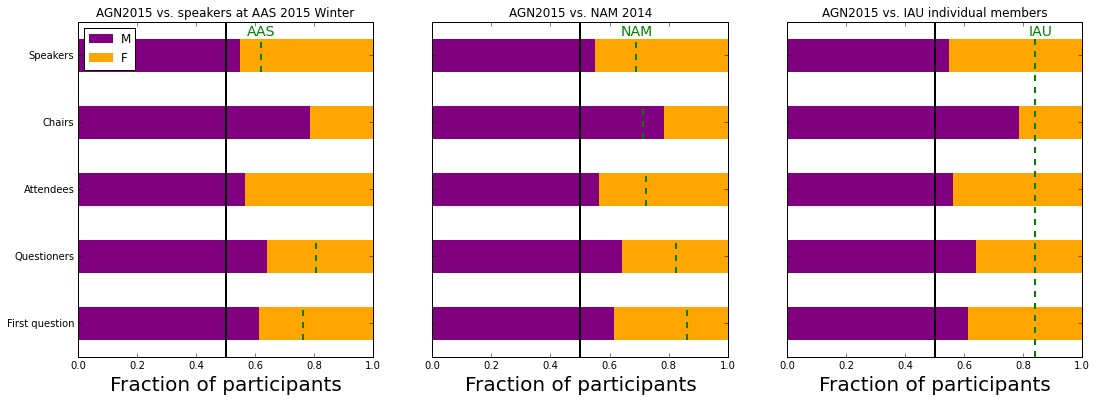

In [2]:
# Plot stacked bar chart
fig = plt.figure(1,(18,6))
ax1 = fig.add_subplot(131)

dfplot = df.plot(kind='barh',stacked=True,ax=ax1,color=gencolors,legend=False)

# Find data positions of the plots

patches = dfplot.patches
yc = [p.get_y() for p in patches]
yc = yc[:int(len(yc)/2)]
height = p.get_height()

ylims1 = ax1.get_ylim()
ax1.vlines(0.5,ylims1[0],ylims1[1],color='k',linestyle='-')

def getfrac(m,f):
    return m * 1./(f+m)

# Speaker/questioner data from 225th AAS Meeting (Seattle, WA)
# Data from https://github.com/jradavenport/aas225-gender

aas225_speakers = getfrac(83,51)
aas225_questionaskers = getfrac(305,73)
aas225_firstquestion = getfrac(102,32)

ax1.vlines(aas225_speakers,yc[-1],yc[-1]+height,color='g',linestyle='--')
ax1.vlines(aas225_questionaskers,yc[-4],yc[-4]+height,color='g',linestyle='--')
ax1.vlines(aas225_firstquestion,yc[-5],yc[-5]+height,color='g',linestyle='--')

ax1.text(aas225_speakers,yc[-1]+height,'AAS',ha='center',va='bottom',fontsize=14,color='g')

ax1.set_xlabel('Fraction of participants',fontsize=20)

p,l = ax1.get_legend_handles_labels()
ax1.legend(p,l,loc='upper left')

ax1.set_title('AGN2015 vs. speakers at AAS 2015 Winter')

# Speaker/questioner data from National Astronomy Meeting 2014 (Portsmouth, UK)
# Data from Pritchard et al. (2014) http://arXiv.org/abs/1412.4571

ax2 = fig.add_subplot(132)
dfblank = pd.DataFrame(normdata,index=[' ']*5)
dfplot2 = dfblank.plot(kind='barh',stacked=True,ax=ax2,color=gencolors,legend=False)

nam_speakers = getfrac(181,81)
nam_chairs = getfrac(188,75)
nam_attendees = getfrac(452,172)
nam_questionaskers = getfrac(476,101)
nam_firstquestion = getfrac(216,35)

ylims2 = ax2.get_ylim()
ax2.vlines(0.5,ylims2[0],ylims2[1],color='k',linestyle='-')

ax2.vlines(nam_speakers,yc[-1],yc[-1]+height,color='g',linestyle='--')
ax2.vlines(nam_chairs,yc[-2],yc[-2]+height,color='g',linestyle='--')
ax2.vlines(nam_attendees,yc[-3],yc[-3]+height,color='g',linestyle='--')
ax2.vlines(nam_questionaskers,yc[-4],yc[-4]+height,color='g',linestyle='--')
ax2.vlines(nam_firstquestion,yc[-5],yc[-5]+height,color='g',linestyle='--')

ax2.text(nam_speakers,yc[-1]+height,'NAM',ha='center',va='bottom',fontsize=14,color='g')

ax2.set_xlabel('Fraction of participants',fontsize=20)

ax2.set_title('AGN2015 vs. NAM 2014')

# IAU individual members (as of Apr 2015)
# Data from http://www.iau.org/administration/membership/individual/distribution/

ax3 = fig.add_subplot(133)
dfplot3 = dfblank.plot(kind='barh',stacked=True,ax=ax3,color=gencolors,legend=False)
iau_frac = getfrac(9546,1803)
ylims3 = ax3.get_ylim()
ax3.vlines(0.5,ylims3[0],ylims3[1],color='k',linestyle='-')
ax3.vlines(iau_frac,ylims3[0],yc[-1]+height,color='g',linestyle='--')
ax3.text(iau_frac*1.02,yc[-1]+height,'IAU',ha='center',va='bottom',fontsize=14,color='g')

ax3.set_xlabel('Fraction of participants',fontsize=20)

ax3.set_title('AGN2015 vs. IAU individual members');

### Analysis of the demographics compared to other meetings/organizations:

The data from the **225th AAS meeting** did not track the gender of either the session chair or the total number of attendees. The <span style="color:red">AGN2015</span> meeting had a higher proportion of women for both the speakers (45% to 38%) and the people asking questions (35% to 19%). 

The **NAM 2014** meeting tracked data in an identical format to <span style="color:red">AGN2015</span>. The <span style="color:red">AGN2015</span> meeting had a higher percentage of women for speakers, attendees, and question askers. In particular, the gender distribution of people asking questions is twice as high for <span style="color:red">AGN2015</span> (35%) as for NAM (17%). This is driven by the large disparity in gender distribution between attendees and questioners at NAM. The gender of the session chairs is the only category in which NAM has a higher percentage of females than <span style="color:red">AGN2015</span>. However, we note that there were only 14 sessions at <span style="color:red">AGN2015</span>, compared to 64 sessions at NAM. Some (although likely not all) of the high fraction of males at <span style="color:red">AGN2015</span> may be due to the smaller sample size.

Finally, we look at the gender representation compared to the most recent data for members of the **International Astronomical Union** (IAU). The IAU is 85% male/15% female, a distribution significantly in excess of every demographic category measured for <span style="color:red">AGN2015</span>. Membership in the IAU is likely not indicative of the astronomical community, especially since the requirements involve nominations by national professional organizations and thus skew toward more senior astronomers (which are more likely to be male). 

## How many questions per talk were there? Was this affected by the gender of the speaker?

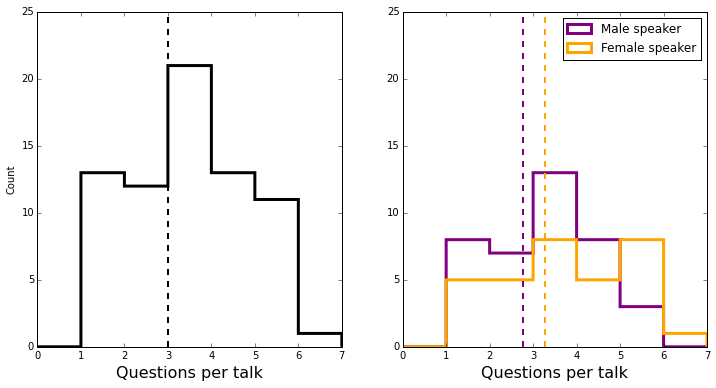

There are 3.0 +- 1.4 total questions per talk
There are 2.8 questions per talk when the speaker is male
There are 3.3 questions per talk when the speaker is female 
There is a 41.2 percent chance that the questions are drawn from the same distribution for male and female speakers.


In [3]:
# How many questions were there per talk? Did the gender of the speaker affect it?

fig2 = plt.figure(2,(12,6))
ax4 = fig2.add_subplot(121)
qpt = [len(x) for x in q['questions']]
ax4.hist(qpt,bins=range(0,8),histtype='step',range=(0,8),linewidth=3, color='k')
ylims4 = ax4.get_ylim()
ax4.vlines(np.mean(qpt),ylims4[0],ylims4[1],linestyle='--',color='black')
ax4.set_xlabel('Questions per talk',fontsize=16)
ax4.set_ylabel('Count')

ax5 = fig2.add_subplot(122)
mq = [len(x[1]['questions']) for x in q.iterrows() if x[1]['speaker'] == 'M']
fq = [len(x[1]['questions']) for x in q.iterrows() if x[1]['speaker'] == 'F']
ax5.hist(mq,bins=range(0,8),histtype='step',range=(0,8),linewidth=3, color='purple',label='Male speaker')
ax5.hist(fq,bins=range(0,8),histtype='step',range=(0,8),linewidth=3, color='orange',label='Female speaker')
ax5.set_ylim(ax4.get_ylim())
ylims5 = ax5.get_ylim()
ax5.vlines(np.mean(mq),ylims5[0],ylims5[1],linestyle='--',color='purple')
ax5.vlines(np.mean(fq),ylims5[0],ylims5[1],linestyle='--',color='orange')
ax5.set_xlabel('Questions per talk',fontsize=16)
ax5.legend(loc='upper right')

plt.show()

# Test to see if the distribution is different for male vs. female speakers

from scipy.stats import ks_2samp

D,p = ks_2samp(mq,fq)
print 'There are %.1f +- %.1f total questions per talk' % (np.mean(qpt),np.std(qpt))
print 'There are %.1f questions per talk when the speaker is male' % np.mean(mq)
print 'There are %.1f questions per talk when the speaker is female ' % np.mean(fq)
print 'There is a %.1f percent chance that the questions are drawn from the same distribution for male and female speakers.' % (p*100)

Engagement with the speakers was nicely high at the <span style="color:red">AGN2015</span> conference, with an average of 3 questions per talk being asked. This was higher than the averages for both the NAM $(2.2\pm1.1)$ and AAS $(2.8\pm1.5)$ meetings. The number of questions per talk was slightly higher when the speaker was female instead of male, with 3.3 compared to 2.8. However, a two-sided Kolmogorov-Smirnov test gives a 41% chance that the two samples are drawn from the same distribution, with no indication of a statistically significant difference. 

A difference in the number of questions per talk depending on the speaker might be interpreted as either a positive or negative effect (preferentially ignoring speakers of certain genders, overaggressively questioning/harassing them, paying attention and engaging with them, etc). More analysis on this data set would be pure speculation from me as to which was responsible at this conference. 

## Did the gender of people of asking questions depend on the speaker's gender?

                                 M         F
Male asks 1st question    0.694444  0.305556
Female asks 1st question  0.586538  0.413462


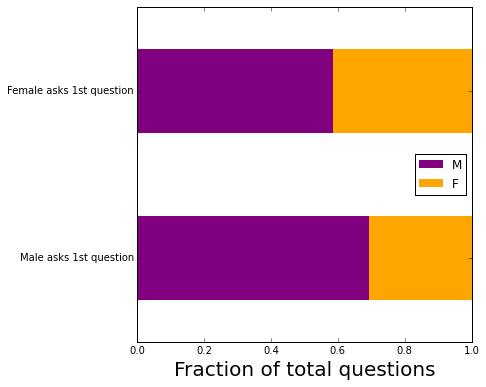

In [4]:
fig3 = plt.figure(3,(6,6))

malefirst_maleafter = ['M'*x[1]['questions'].count('M') for x in q.iterrows() if x[1]['speaker'] == 'M']
malefirst_femaleafter = ['F'*x[1]['questions'].count('F') for x in q.iterrows() if x[1]['speaker'] == 'M']
femalefirst_maleafter = ['M'*x[1]['questions'].count('M') for x in q.iterrows() if x[1]['speaker'] == 'F']
femalefirst_femaleafter = ["F"*x[1]['questions'].count('F') for x in q.iterrows() if x[1]['speaker'] == 'F']
vc_malefirst = pd.value_counts(list(''.join(malefirst_maleafter+malefirst_femaleafter)))
vc_femalefirst = pd.value_counts(list(''.join(femalefirst_maleafter+femalefirst_femaleafter)))

# Load everything into a single dataframe

firstdata = [vc_malefirst,vc_femalefirst]
firstlabels = ['Male asks 1st question','Female asks 1st question']

firstnormdata = [x/x.sum() for x in firstdata]
df = pd.DataFrame(firstnormdata,index=firstlabels)

print df

# Plot stacked bar chart

ax = fig3.add_subplot(111)
dfplot = df.plot(kind='barh',stacked=True,ax=ax,color=gencolors,legend=True)

ax.set_xlabel('Fraction of total questions',fontsize=20);

When women ask the **first** question in a session, women ask on average 40% of the total number of questions in such sessions. However, when men ask the first question in a session, women only ask 31% of the total questions in the session.

But this is clearly affected by the fact that the gender of the first question is fixed. To isolate that effect, let's look at the *remaining* questions in the session. 

                                 M         F
Male asks 1st question    0.666667  0.333333
Female asks 1st question  0.637931  0.362069
z = 0.354; p = 0.362


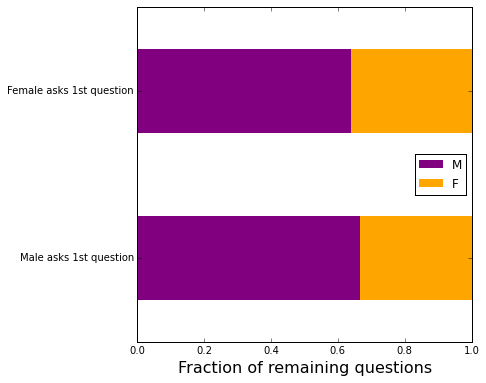

In [9]:
malefirst_maleafter = ['M'*x[1]['questions'][1:].count('M') for x in q.iterrows() if x[1]['questions'][0] == 'M']
malefirst_femaleafter = ['F'*x[1]['questions'][1:].count('F') for x in q.iterrows() if x[1]['questions'][0] == 'M']
vc_malefirst_remaining = pd.value_counts(list(''.join(malefirst_maleafter+malefirst_femaleafter)))

femalefirst_maleafter = ['M'*x[1]['questions'][1:].count('M') for x in q.iterrows() if x[1]['questions'][0] == 'F']
femalefirst_femaleafter = ["F"*x[1]['questions'][1:].count('F') for x in q.iterrows() if x[1]['questions'][0] == 'F']
vc_femalefirst_remaining = pd.value_counts(list(''.join(femalefirst_maleafter+femalefirst_femaleafter)))

# Load everything into a single dataframe

firstrdata = [vc_malefirst_remaining,vc_femalefirst_remaining]
firstrlabels = ['Male asks 1st question','Female asks 1st question']

firstrnormdata = [x/x.sum() for x in firstrdata]
#print firstrnormdata
dfr = pd.DataFrame(firstrnormdata,index=firstrlabels)

print dfr

# Plot stacked bar chart

fig = plt.figure(4,(6,6))
ax8 = fig.add_subplot(111)
dfplot = dfr.plot(kind='barh',stacked=True,ax=ax8,color=gencolors,legend=True)

ax8.set_xlabel('Fraction of remaining questions',fontsize=16)
ax8.set_xlim(0,1)

# Check statistical significance using a two-sample Z-test (assumes normal distribution)
# http://stats.stackexchange.com/questions/113602/test-if-two-binomial-distributions-are-statistically-different-from-each-other

from scipy.special import ndtr
def ztest(p1,p2,n1,n2):
    pexp = (n1*p1exp + n2*p2exp) / (n1+n2)
    z = (p1exp-p2exp) / np.sqrt(pexp*(1. - pexp)*(1/n1 + 1/n2))
    return z

p1exp,p2exp = dfr['M']
n1 = len(list(''.join(malefirst_maleafter+malefirst_femaleafter)))
n2 = len(list(''.join(femalefirst_maleafter+femalefirst_femaleafter)))
z = ztest(p1exp,p2exp,n1,n2)
print("z = {0:.3f}; p = {1:.3f}".format(z,1. - ndtr(z)))

When the first question is eliminated from the data, the fraction of questions asked by females are nearly identical for females and males (33% and 36%, respectively). A two-proportion $z$-test indicates the distributions cannot reject the null hypothesis at $<1\sigma$ ($p < 0.32$) level. 

This result differs from the AAS meeting data, who found an extremely strong difference between the two. If the first question was asked by a male, then only 10% of the remaining questions were asked by a female. If the first question was asked by a female, 49% of the remaining questions were asked by a female. 

## Does the gender of the session chair affect the distribution of the questioners' gender?

                     M         F
Male chair    0.640000  0.360000
Female chair  0.648649  0.351351
z = -0.100; p = 0.540


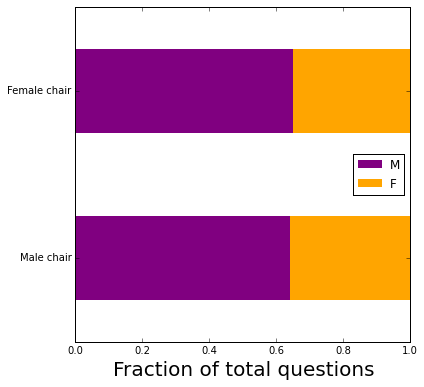

In [10]:
cdict = {}
for k,v in zip(c['block'].values,c['gender'].values):
    cdict[k]=v

malechair_maleafter = ['M'*x[1]['questions'].count('M') for x in q.iterrows() if cdict[int(str(x[1]['session']).split('.')[0])] == 'M']
malechair_femaleafter = ['F'*x[1]['questions'].count('F') for x in q.iterrows() if cdict[int(str(x[1]['session']).split('.')[0])] == 'M']
femalechair_maleafter = ['M'*x[1]['questions'].count('M') for x in q.iterrows() if cdict[int(str(x[1]['session']).split('.')[0])] == 'F']
femalechair_femaleafter = ["F"*x[1]['questions'].count('F') for x in q.iterrows() if cdict[int(str(x[1]['session']).split('.')[0])] == 'F']
vc_malechair = pd.value_counts(list(''.join(malechair_maleafter+malechair_femaleafter)))
vc_femalechair = pd.value_counts(list(''.join(femalechair_maleafter+femalechair_femaleafter)))

# Load everything into a single dataframe

chairdata = [vc_malechair,vc_femalechair]
chairlabels = ['Male chair','Female chair']

chairnormdata = [x/x.sum() for x in chairdata]
df = pd.DataFrame(chairnormdata,index=chairlabels)

print df

# Plot stacked bar chart
fig5 = plt.figure(3,(6,6))
ax = fig5.add_subplot(111)
dfplot = df.plot(kind='barh',stacked=True,ax=ax,color=gencolors,legend=True)

ax.set_xlabel('Fraction of total questions',fontsize=20)

# Check statistical significance

p1exp,p2exp = df['M']
n1 = len(list(''.join(malechair_maleafter+malechair_femaleafter)))
n2 = len(list(''.join(femalechair_maleafter+femalechair_femaleafter)))
z = ztest(p1exp,p2exp,n1,n2)
print("z = {0:.3f}; p = {1:.3f}".format(z,1. - ndtr(z)))

When looking at the gender of the session chair (who might have selection biases when there are more questions than time permits), there is no difference in the gender distribution of questioners. In this case the data are nearly identical for male vs. female chairs, at 36% and 35% females respectively. 

This null result differs from the NAM data, who saw a small but significant decrease in the fraction of females asking questions when the chair was male (16%) as opposed to a female chair (22%). 

## (Some) conclusions

I'm not sure what my expectations were in looking at data for a smaller, specialized meeting vs. a large general meeting like the AAS or NAM. I don't think I would have been hugely surprised by either significant differences or none at all --- I could easily have guessed that a smaller, specialized meeting is more subject to the whims of an SOC (who are more likely to be senior and thus might tend to invite senior colleagues, which would presumably skew the gender ratio towards more males). On the other hand, postdocs and early-career researchers might travel more (without teaching responsibilities mid-semester) and be more invested in giving talks to establish themselves for permanent jobs, which would skew toward younger people and a higher female-male ratio. The demographics of the AGN/galaxy community, the relatively remote conference location in South America, and the timing of the meeting are all priors that should be taken into account in a full analysis.

One extremely important point is that this is a [sample size](https://youtu.be/dw9qqvm-LT8) of $N=1$. We need lots more data on other conferences, in different subfields, different parts of the world, and different conference structures. Unlike the large meetings, though, data collection can pretty easily be done by one person, and we're starting to put together some standard graphs and questions we can ask through open data sets [(all of this data is available on Github)](https://github.com/willettk/chile2015-gender) and joint analysis tools like the iPython notebook. I hope it's easy to clone this work for future conferences; I'm happy to help anyone who wants to try that. 

Given that limited sample size, I think the results for <span style="color:red">AGN2015</span> were really encouraging. I found:

* both the attendees and questioners had significantly higher female/male ratios than the NAM or AAS meetings
* the male/female ratio was similar for both attendees and speakers, meaning that there was no apparent preference towards which gender got the opportunity to give a talk
* both male and female speakers received about the same number of questions per talk
* the gender of the first person to ask a question didn't affect subsequent questions
* the gender of the session chair didn't affect subsequent questions

The main (possible) negative was that the session chairs were overwhelmingly male (again, a possible reflection of a seniority bias). However, this is presumably simpler to correct for an SOC/LOC, is subject to small sample size variance, and doesn't appear to have affected the engagement with the audience, which is good. I also should note for <span style="color:red">AGN2015</span> that the three end-of-day discussions were all moderated by women, and the conference summary was also delivered by a woman. My unofficial impression is that this conference probably had a younger-than-average age, especially among speakers. The targeted talks at this conference were unofficially designated as being reserved for "*young people doing cool things*" by the SOC. I'd love to see more of that in every conference, since I think it'd help with both scientific output and participant balance, but those are my own personal biases in play. 

So maybe smaller conferences are better at gender balance and engagement than larger meetings? As always, we need **lots more data** to see if the effect is real, and to think about what the community can do as a result. 

*Thanks to the conference organizers of <span style="color:red">AGN2015</span> for inviting me to the meeting, to Meg Urry for presenting some of these results in her conference summary, and to James Davenport, Jonathan Pritchard, and Karen Masters for their previous hard work at the AAS and NAM meetings.*